<p align="center">
<font size="7"><b>
Clasificación de aves europeas por su canto mediante aprendizaje automático
</b></font>
</p>

<br>

<p align="center">
<font size="5"><b>
Universidad Industrial de Santander<br>
Inteligencia Artificial 1 — 2025-2 Grupo E1<br>
Fabio Martínez Carrillo
</b></font>
</p>

<br>

<p align="center">
<font size="4">
<b>Integrantes:</b><br>
Juan David León Delgado 2211587<br>
Alejandro Velandia 2221552<br>
Jonathan Parra 2224509<br>
</font>
</p>

<br>

# **Objetivo**

Desarrollar modelos de aprendizaje automático que permitan clasificar especies de aves europeas a partir de sus cantos, utilizando características acústicas extraídas como MFCC y contraste espectral, con el fin de apoyar la biología, la preservación ambiental y el monitoreo de ecosistemas.

---
# **Cargar el dataset**

In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("radgeni/european-male-bird-song-dataset-refined")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'european-male-bird-song-dataset-refined' dataset.
Path to dataset files: /kaggle/input/european-male-bird-song-dataset-refined


In [ ]:
import os
for root, dirs, files in os.walk(path):
    print(f"📁 Carpeta: {root}")
    for f in files[:5]:  # muestra solo los primeros 5 archivos por carpeta
        print(f"  └── {f}")

📁 Carpeta: /root/.cache/kagglehub/datasets/radgeni/european-male-bird-song-dataset-refined/versions/1
  └── EMBS_with_mfcc_and_spec_contr.csv
📁 Carpeta: /root/.cache/kagglehub/datasets/radgeni/european-male-bird-song-dataset-refined/versions/1/processed_dataset
📁 Carpeta: /root/.cache/kagglehub/datasets/radgeni/european-male-bird-song-dataset-refined/versions/1/processed_dataset/processed_dataset
  └── XC508682_1.mp3
  └── XC310635_3.mp3
  └── XC412511_10.mp3
  └── XC172333_87.mp3
  └── XC422008_8.mp3


In [ ]:
import pandas as pd

# CSV de información
ruta_csv = f"{path}/EMBS_with_mfcc_and_spec_contr.csv"

# Carpeta donde están los audios
carpeta_audios = f"{path}/processed_dataset/processed_dataset"

# Cargar el dataframe
df = pd.read_csv(ruta_csv)
df.columns

Index(['file_code', 'genus', 'species', 'english_name', 'rec', 'country',
       'loc', 'type', 'sono', 'remarks', 'length', 'file_path', 'mfcc_0',
       'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7',
       'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
       'spectral_contrast_0', 'spectral_contrast_1', 'spectral_contrast_2',
       'spectral_contrast_3', 'spectral_contrast_4', 'spectral_contrast_5',
       'spectral_contrast_6'],
      dtype='object')

# **Visualización inicial del dataset**

In [ ]:
# resumen general
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13787 entries, 0 to 13786
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   file_code            13787 non-null  object 
 1   genus                13787 non-null  object 
 2   species              13787 non-null  object 
 3   english_name         13787 non-null  object 
 4   rec                  13787 non-null  object 
 5   country              13787 non-null  object 
 6   loc                  13787 non-null  object 
 7   type                 13787 non-null  object 
 8   sono                 13787 non-null  object 
 9   remarks              8051 non-null   object 
 10  length               13787 non-null  int64  
 11  file_path            13787 non-null  object 
 12  mfcc_0               13787 non-null  float64
 13  mfcc_1               13787 non-null  float64
 14  mfcc_2               13787 non-null  float64
 15  mfcc_3               13787 non-null 

,length,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,mfcc_10,mfcc_11,mfcc_12,spectral_contrast_0,spectral_contrast_1,spectral_contrast_2,spectral_contrast_3,spectral_contrast_4,spectral_contrast_5,spectral_contrast_6
count,13787.000000,13787.000000,13787.000000,13787.000000,13787.000000,13787.000000,13787.000000,13787.000000,13787.000000,13787.000000,...,13787.000000,13787.000000,13787.000000,13787.000000,13787.000000,13787.000000,13787.000000,13787.000000,13787.000000,13787.000000
mean,9.612461,-462.505408,71.004667,-45.830254,28.409931,-4.061862,3.737719,-6.619961,7.421037,-6.593754,...,-2.645793,0.449905,0.354596,12.929748,9.509370,12.502257,14.203894,17.824570,20.569875,55.684083
std,1.616423,88.462128,48.878342,41.143769,34.061743,27.240469,19.244488,17.286859,13.153981,12.521616,...,9.725783,8.526472,8.207835,3.919293,2.573511,3.171665,3.071986,3.596286,4.708587,4.533562
min,0.000000,-1131.370972,-136.052261,-208.284592,-111.005478,-106.371994,-62.087025,-80.187569,-47.007664,-62.888603,...,-53.249199,-37.014061,-39.818157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,-512.546539,46.278887,-72.418526,6.286629,-22.514201,-9.233958,-17.160591,-0.957991,-13.847185,...,-8.930283,-5.098833,-4.566513,9.976141,8.015431,10.475969,12.638781,15.555735,17.675659,54.441724
50%,10.000000,-461.201630,73.434807,-41.756828,31.795853,-2.758221,4.907049,-6.579081,7.848706,-5.281852,...,-2.102447,-0.088241,0.588821,11.833754,8.548908,11.555417,13.252843,17.290419,20.130131,56.287411
75%,10.000000,-406.219833,102.071110,-13.973129,50.882999,15.160741,16.369280,4.371620,15.864795,1.679125,...,4.185400,5.383121,5.736554,14.931215,9.848628,13.153873,14.352605,19.235785,22.821548,58.003288
max,10.000000,-152.496872,283.476715,88.410385,136.744278,81.289429,116.045135,61.381805,59.443737,40.976051,...,42.914837,39.042587,50.570038,31.940736,31.923128,33.189300,40.080930,51.760629,61.053403,65.353002


In [ ]:
df.head(5)

,file_code,genus,species,english_name,rec,country,loc,type,sono,remarks,...,mfcc_10,mfcc_11,mfcc_12,spectral_contrast_0,spectral_contrast_1,spectral_contrast_2,spectral_contrast_3,spectral_contrast_4,spectral_contrast_5,spectral_contrast_6
0,477200_0,Acrocephalus,dumetorum,Blyth's Reed Warbler,Dawid Jablonski,Poland,"Lublin Governorate (near Lublin), Lublin, lub...","male, song",{'small': '//www.xeno-canto.org/sounds/uploade...,some more crazy sounds from this bird,...,0.286674,-4.420581,3.339694,9.953814,12.101409,17.657184,14.723350,17.779158,22.703599,57.060623
1,477200_1,Acrocephalus,dumetorum,Blyth's Reed Warbler,Dawid Jablonski,Poland,"Lublin Governorate (near Lublin), Lublin, lub...","male, song",{'small': '//www.xeno-canto.org/sounds/uploade...,some more crazy sounds from this bird,...,2.736630,-1.192829,0.928761,10.559975,13.239876,19.564674,13.872589,15.723127,20.183332,57.187180
2,477200_2,Acrocephalus,dumetorum,Blyth's Reed Warbler,Dawid Jablonski,Poland,"Lublin Governorate (near Lublin), Lublin, lub...","male, song",{'small': '//www.xeno-canto.org/sounds/uploade...,some more crazy sounds from this bird,...,-3.576685,-6.518206,2.626135,10.032784,13.753941,18.287779,14.866372,16.986885,22.000892,56.702742
3,477200_3,Acrocephalus,dumetorum,Blyth's Reed Warbler,Dawid Jablonski,Poland,"Lublin Governorate (near Lublin), Lublin, lub...","male, song",{'small': '//www.xeno-canto.org/sounds/uploade...,some more crazy sounds from this bird,...,-2.819357,-4.917232,-0.408354,10.436496,12.106098,18.470026,15.681212,18.217725,25.542182,54.309805
4,477200_4,Acrocephalus,dumetorum,Blyth's Reed Warbler,Dawid Jablonski,Poland,"Lublin Governorate (near Lublin), Lublin, lub...","male, song",{'small': '//www.xeno-canto.org/sounds/uploade...,some more crazy sounds from this bird,...,-2.918867,-10.565835,-4.472186,10.343865,12.425120,17.124287,16.313742,18.648603,25.062909,54.100527


/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


Archivo de audio: XC508682_1.mp3
Ave detectada: European Greenfinch (Chloris chloris)


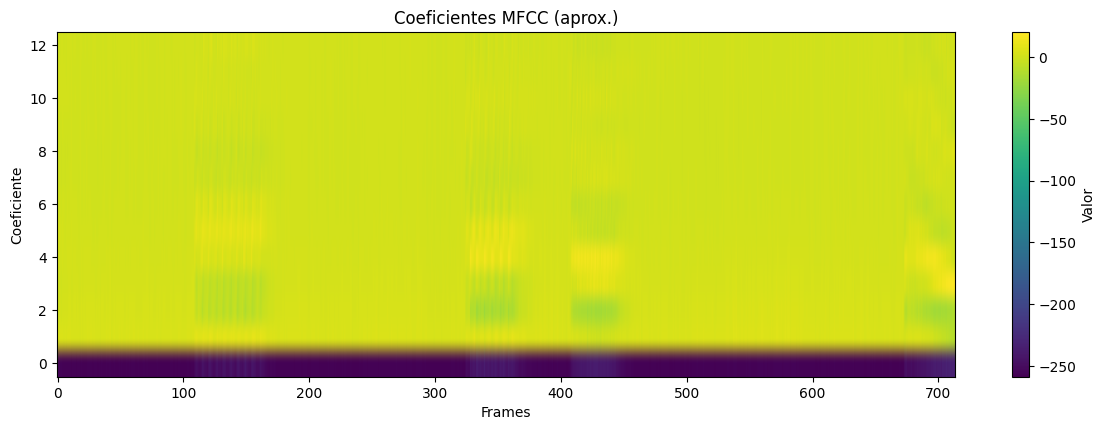

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from scipy.fftpack import dct
from pydub import AudioSegment


archivo = os.listdir(carpeta_audios)[0]  # toma el primero para probar
ruta_mp3 = os.path.join(carpeta_audios, archivo)

# Extraer ID de la grabación (ej: XC121601_21.mp3 → 121601_21)
grab_id = archivo.removesuffix(".mp3").removeprefix("XC")

# Buscar en el CSV
fila = df[df["file_code"] == grab_id]
if not fila.empty:
    nombre_ave = fila.iloc[0]["english_name"]
    genero = fila.iloc[0]["genus"]
    especie = fila.iloc[0]["species"]
else:
    nombre_ave = "Desconocido"
    genero = especie = ""

print(f"Archivo de audio: {archivo}")
print(f"Ave detectada: {nombre_ave} ({genero} {especie})")

# Leer archivo mp3 y convertir a array numpy
audio = AudioSegment.from_mp3(ruta_mp3).set_channels(1).set_frame_rate(16000)
sr = audio.frame_rate
y = np.array(audio.get_array_of_samples()).astype(np.float32) / (2**15)  # normalizado

# Espectrograma
f, tt, Sxx = spectrogram(y, sr)

# MFCCs aproximados (con DCT)
log_Sxx = np.log(Sxx + 1e-10)
mfcc_feat = dct(log_Sxx, type=2, axis=0, norm='ortho')[:13, :]

# Graficar
plt.figure(figsize=(12, 8))

# Espectrograma
#plt.subplot(2, 1, 1)
#plt.pcolormesh(tt, f, 10*np.log10(Sxx), shading='gouraud')
#plt.ylabel('Frecuencia [Hz]')
#plt.xlabel('Tiempo [s]')
#plt.title(f"Espectrograma - {nombre_ave} ({genero} {especie})")
#plt.colorbar(label='Intensidad [dB]')

# MFCCs
plt.subplot(2, 1, 2)
plt.imshow(mfcc_feat, aspect='auto', origin='lower')
plt.title("Coeficientes MFCC (aprox.)")
plt.ylabel('Coeficiente')
plt.xlabel('Frames')
plt.colorbar(label='Valor')

plt.tight_layout()
plt.show()

# **Gráficas y análisis de los datos**

Cantidad de géneros

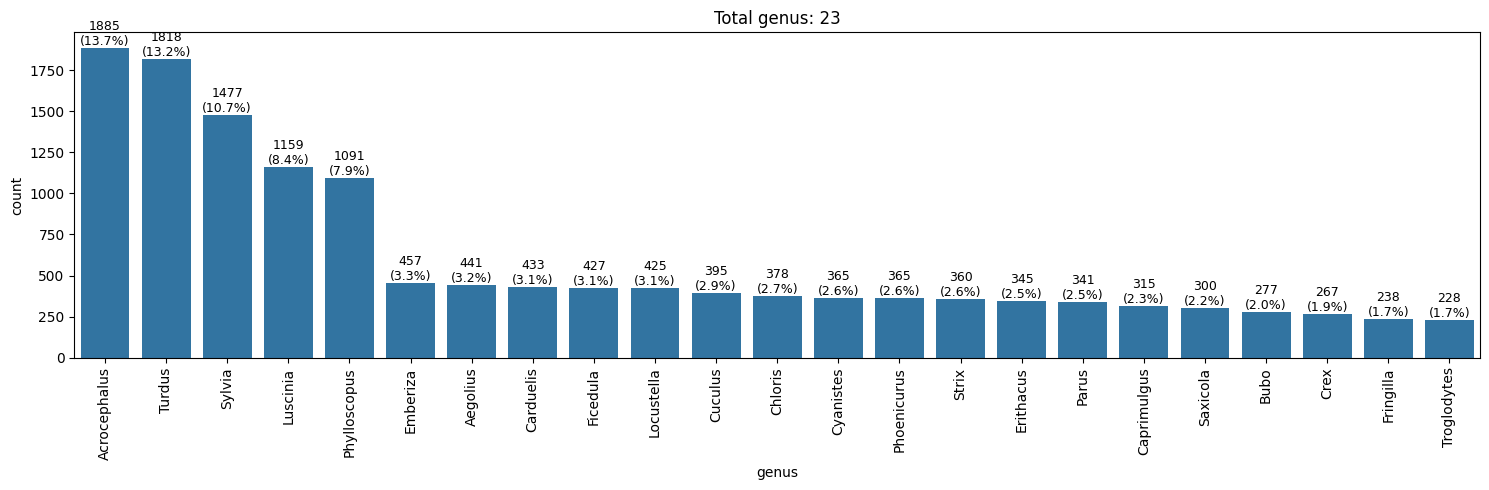

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
ax = sns.countplot(data=df, x="genus", order=df["genus"].value_counts().index)

# Total de registros
total = len(df)

# Agregar etiquetas encima de cada barra
for p in ax.patches:
    count = int(p.get_height())
    percent = 100 * count / total
    ax.annotate(f'{count}\n({percent:.1f}%)',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9, rotation=0)

# Ajustes visuales
plt.xticks(rotation=90)
plt.title(f"Total genus: {df['genus'].nunique()}")
plt.tight_layout()
plt.show()

Cantidad de especies

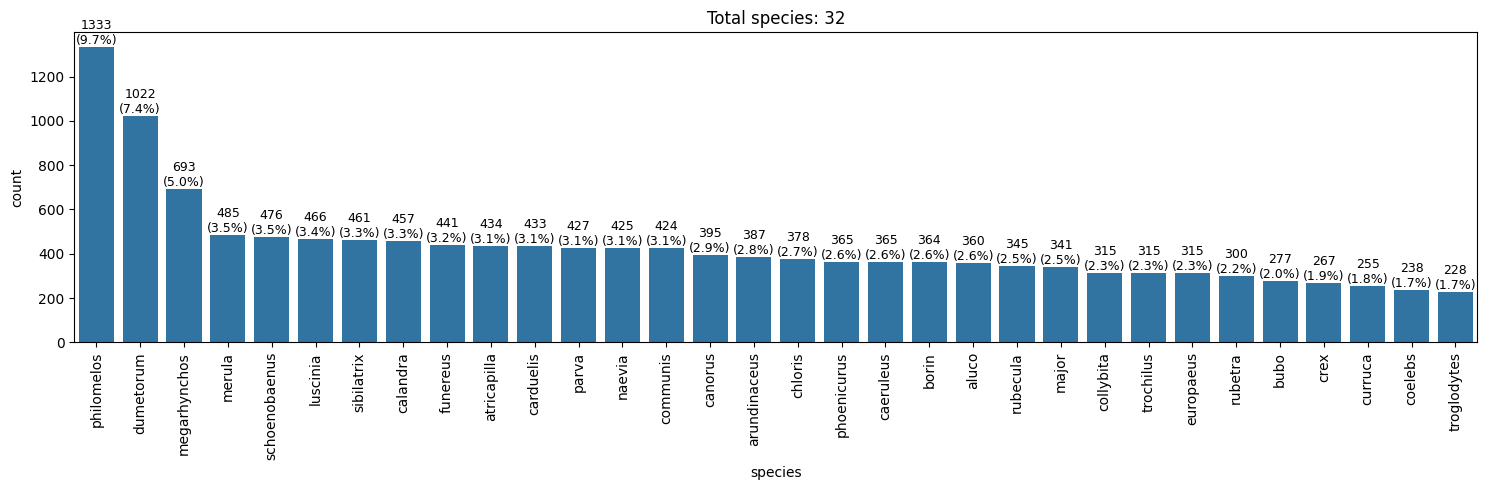

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=df, x="species", order=df["species"].value_counts().index)

# Total de registros
total = len(df)

# Agregar etiquetas encima de cada barra
for p in ax.patches:
    count = int(p.get_height())
    percent = 100 * count / total
    ax.annotate(f'{count}\n({percent:.1f}%)',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9, rotation=0)

# Ajustes visuales
plt.xticks(rotation=90)
plt.title(f"Total species: {df['species'].nunique()}")
plt.tight_layout()
plt.show()

Cantidad de especies por género

In [ ]:
species_genero = df.groupby("genus")["species"].unique().reset_index()
species_genero.columns = ["genus", "species"]
species_genero["cantidad"] = df.groupby("genus")["species"].nunique().reset_index()["species"]

pd.set_option("display.max_colwidth", None)
species_genero[["genus","cantidad","species"]]

,genus,cantidad,species
0,Acrocephalus,3,"[dumetorum, arundinaceus, schoenobaenus]"
1,Aegolius,1,[funereus]
2,Bubo,1,[bubo]
3,Caprimulgus,1,[europaeus]
4,Carduelis,1,[carduelis]
5,Chloris,1,[chloris]
6,Crex,1,[crex]
7,Cuculus,1,[canorus]
8,Cyanistes,1,[caeruleus]
9,Emberiza,1,[calandra]


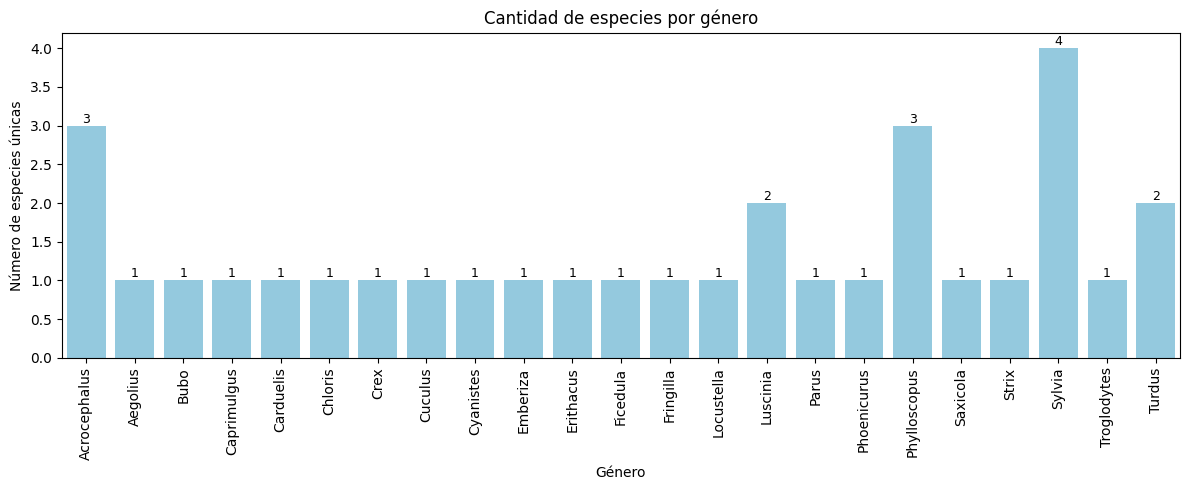

In [ ]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=species_genero, x="genus", y="cantidad", color="skyblue")

# Agregar cantidad encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=9)

# Ajustes visuales
plt.xticks(rotation=90)
plt.title("Cantidad de especies por género")
plt.ylabel("Número de especies únicas")
plt.xlabel("Género")
plt.tight_layout()
plt.show()


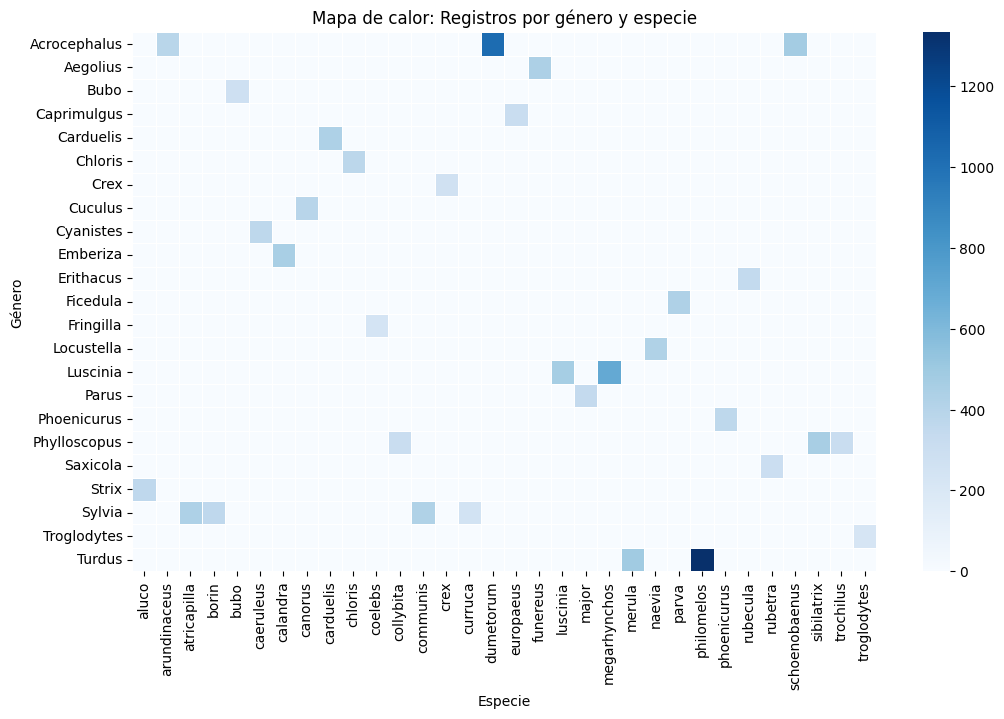

In [ ]:
cross_tab = pd.crosstab(df["genus"], df["species"])

plt.figure(figsize=(12,7))
sns.heatmap(cross_tab, cmap="Blues", cbar=True, linewidths=0.5)
plt.title("Mapa de calor: Registros por género y especie")
plt.xlabel("Especie")
plt.ylabel("Género")
plt.show()

Cantidad de grabaciones por país

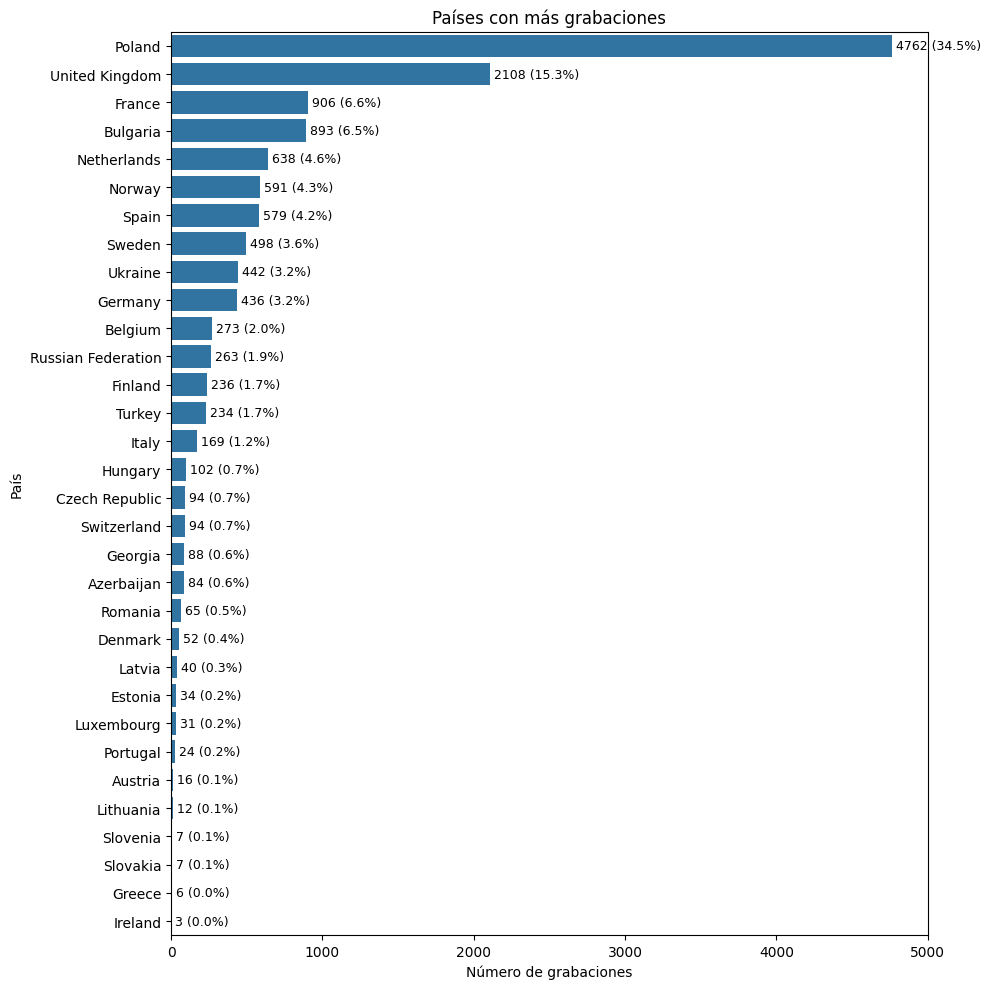

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(data=df, y="country", order=df["country"].value_counts().index)

# Total de grabaciones
total = len(df)

# Agregar etiquetas al final de cada barra
for p in ax.patches:
    count = int(p.get_width())
    percent = 100 * count / total
    ax.annotate(f' {count} ({percent:.1f}%)',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=9)

# Ajustes visuales
plt.title("Países con más grabaciones")
plt.xlabel("Número de grabaciones")
plt.ylabel("País")
plt.tight_layout()
plt.show()

Desbalance de clases:
Algunas especies/géneros tendrán cientos de grabaciones y otras muy pocas.

Sesgo geográfico:
Si la mayoría de registros provienen de ciertos países, estaremos basandonos en características locales, no generalizables.

Ruido taxonómico:
Puede haber inconsistencias en nombres científicos o errores de etiquetado (genus/species mal escritos).

Cantidad de especies por país

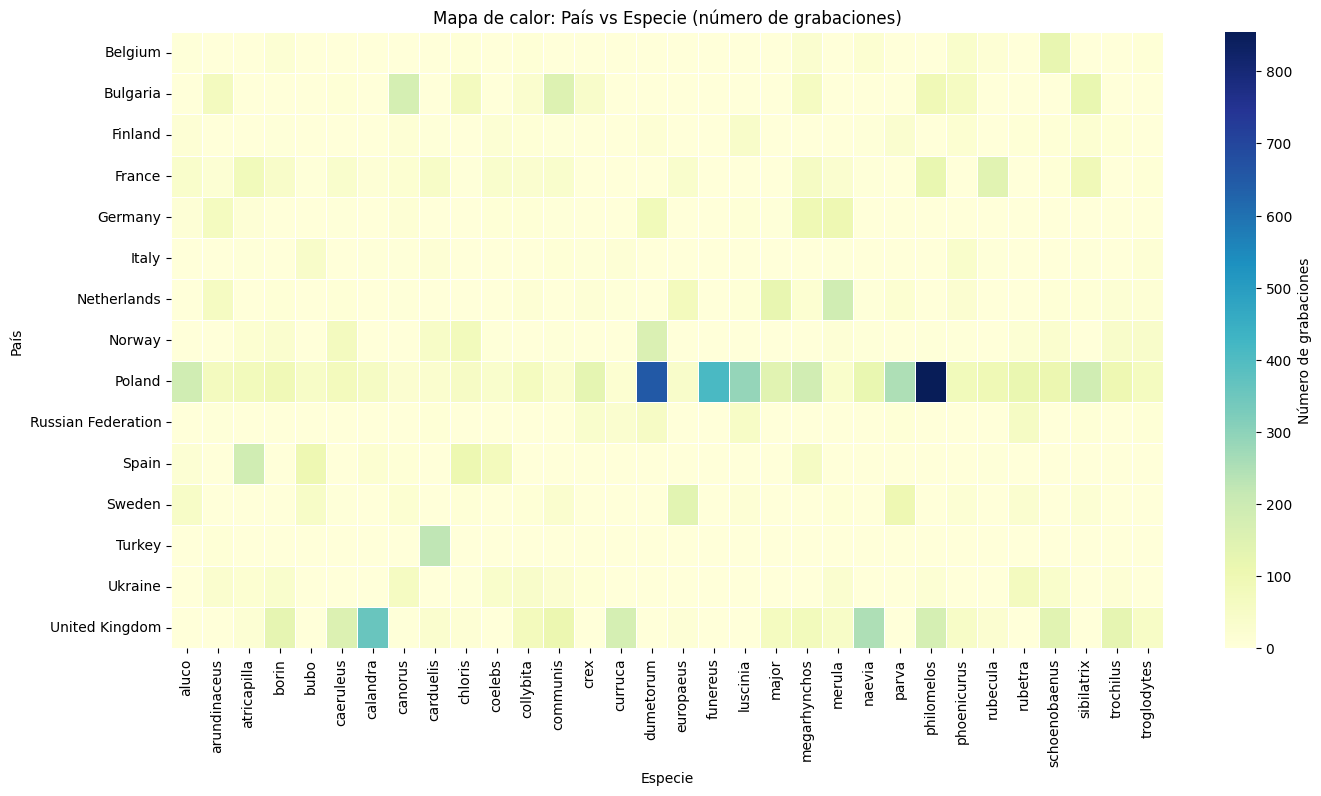

In [ ]:
# Crear tabla dinámica: filas = país, columnas = especie, valores = cantidad de grabaciones
heatmap_data = pd.pivot_table(
    df,
    index="country",
    columns="species",
    values="file_code",   # cualquier columna que identifique registros
    aggfunc="count",
    fill_value=0
)

# Opcional: si hay muchos países/especies, puedes limitar a los más frecuentes
# Ejemplo: top 15 países con más grabaciones
top_countries = df["country"].value_counts().head(15).index
heatmap_data = heatmap_data.loc[heatmap_data.index.isin(top_countries)]

# Graficar
plt.figure(figsize=(16, 8))
sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",
    cbar_kws={"label": "Número de grabaciones"},
    linewidths=.5
)
plt.title("Mapa de calor: País vs Especie (número de grabaciones)")
plt.xlabel("Especie")
plt.ylabel("País")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

distribuciones numericas

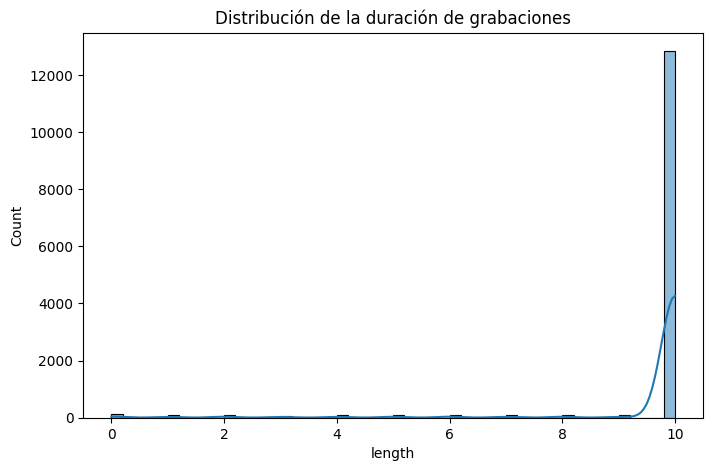

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["length"], bins=50, kde=True)
plt.title("Distribución de la duración de grabaciones")
plt.show()

In [ ]:
import librosa
import os
import pandas as pd

# Ruta base donde están los audios
base = carpeta_audios

duraciones = []
for f in os.listdir(base)[:50]:  # ejemplo con 50 archivos para no tardar mucho
    if f.endswith(".mp3"):
        path = os.path.join(base, f)
        y, sr = librosa.load(path, sr=None)  # sr=None = usa frecuencia original
        dur = librosa.get_duration(y=y, sr=sr)
        duraciones.append((f, dur))

df_dur = pd.DataFrame(duraciones, columns=["archivo", "duracion_seg"])
print(df_dur.head())
print("Duración promedio:", df_dur['duracion_seg'].mean())
print("Duración mínima:", df_dur['duracion_seg'].min())
print("Duración máxima:", df_dur['duracion_seg'].max())


           archivo  duracion_seg
0   XC508682_1.mp3          10.0
1   XC310635_3.mp3          10.0
2  XC412511_10.mp3          10.0
3  XC172333_87.mp3          10.0
4   XC422008_8.mp3          10.0
Duración promedio: 9.354171428571428
Duración mínima: 0.39163265306122447
Duración máxima: 10.0


Grabaciones muy cortas:
Pueden no contener suficiente información acústica para su analisis.

Grabaciones muy largas:
Pueden incluir silencio o ruido no relacionado.

Necesidad de normalización:
Habría que cortar, segmentar o normalizar las longitudes de los audios.

Heterogeneidad de tipos:
un “canto” puede ser 10s en una especie y 2s en otra. Difícil estandarizar.

Poca representatividad:
algunos tipos tendrán muy pocas grabaciones.

Etiqueta subjetiva:
lo que se define como “canto” o “llamada” puede variar según quien grabó.

Cómo varía la duración de las grabaciones según el tipo de vocalización (canto, llamada, alarma, etc.).

Detecta si algunos tipos suelen durar más (ej. cantos largos vs. llamadas cortas).

Posibles outliers (grabaciones demasiado cortas/largas que podrían ser ruido o errores).

Sirve para:

Entender patrones de vocalización.

Identificar datos atípicos en duración.

Comparar entre categorías biológicas/funcionales.

Variables de audio (mfcc_* y spectral_contrast_*)

Son continuas y multidimensionales

## **CLT**

In [ ]:
print(df.species.unique())
print(df.english_name.unique())

['dumetorum' 'funereus' 'merula' 'coelebs' 'collybita' 'canorus' 'naevia'
 'megarhynchos' 'phoenicurus' 'communis' 'calandra' 'crex' 'atricapilla'
 'caeruleus' 'bubo' 'troglodytes' 'carduelis' 'chloris' 'europaeus'
 'rubecula' 'borin' 'arundinaceus' 'major' 'curruca' 'parva'
 'schoenobaenus' 'philomelos' 'aluco' 'luscinia' 'rubetra' 'trochilus'
 'sibilatrix']
["Blyth's Reed Warbler" 'Boreal Owl' 'Common Blackbird' 'Common Chaffinch'
 'Common Chiffchaff' 'Common Cuckoo' 'Common Grasshopper Warbler'
 'Common Nightingale' 'Common Redstart' 'Common Whitethroat'
 'Corn Bunting' 'Corn Crake' 'Eurasian Blackcap' 'Eurasian Blue Tit'
 'Eurasian Eagle-Owl' 'Eurasian Wren' 'European Goldfinch'
 'European Greenfinch' 'European Nightjar' 'European Robin'
 'Garden Warbler' 'Great Reed Warbler' 'Great Tit' 'Lesser Whitethroat'
 'Red-breasted Flycatcher' 'Sedge Warbler' 'Song Thrush' 'Tawny Owl'
 'Thrush Nightingale' 'Whinchat' 'Willow Warbler' 'Wood Warbler']


In [ ]:
import matplotlib.pyplot as plt

def porEspecie(especie):
    nombre = especie.english_name.unique()[0]
    codigo = especie.species.unique()[0]
    print(f"Especie: {codigo} - Nombre: {nombre}")

    fig, axes = plt.subplots(4, 4, figsize=(12, 10))
    fig.suptitle(f"Distribuciones MFCC (0–12) - {nombre}", fontsize=14)

    for i in range(13):
        ax = axes[i // 4, i % 4]
        columna = f"mfcc_{i}"
        if columna in especie.columns:
            valores = especie[columna].dropna()
            ax.hist(valores, bins=valores.shape[0])
            ax.set_title(columna)
            ax.set_xlabel("Valor")
            ax.set_ylabel("Frecuencia")
        else:
            ax.set_visible(False)

    # Ocultar los subplots restantes si no se usan
    for j in range(13, 16):
        axes[j // 4, j % 4].set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

if False:
  df.groupby("species").apply(porEspecie)



---


#**Modelos supervisados**


In [ ]:
semilla = 42

## Pruebas

In [ ]:
# Contar cuántos audios hay por especie
conteo = df["species"].value_counts()

# Crear el array con las especies ordenadas (de mayor a menor)
top_species = conteo.index.to_numpy()

# Mostrar resultados
print(top_species)

['philomelos' 'dumetorum' 'megarhynchos' 'merula' 'schoenobaenus'
 'luscinia' 'sibilatrix' 'calandra' 'funereus' 'atricapilla' 'carduelis'
 'parva' 'naevia' 'communis' 'canorus' 'arundinaceus' 'chloris'
 'phoenicurus' 'caeruleus' 'borin' 'aluco' 'rubecula' 'major' 'collybita'
 'trochilus' 'europaeus' 'rubetra' 'bubo' 'crex' 'curruca' 'coelebs'
 'troglodytes']


Obtener las features mas importantes

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Extraer las características deseadas
cols = df.columns[12:32]
X = df[cols]

# Extraer las etiquetas
# Se deben volver números todas las etiquetas
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(df['species'])

# Crear y entrenar el modelo
tree = DecisionTreeClassifier(random_state=semilla)
tree.fit(X, y)

# Obtener importancias de las features
importances = tree.feature_importances_

# Crear un DataFrame con nombres e importancias
feat_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Mostrar el reporte ordenado
feat_importances

,Feature,Importance
3,mfcc_3,0.083482
0,mfcc_0,0.067108
13,spectral_contrast_0,0.066109
18,spectral_contrast_5,0.063646
17,spectral_contrast_4,0.062984
6,mfcc_6,0.057317
1,mfcc_1,0.053499
8,mfcc_8,0.052299
10,mfcc_10,0.050234
4,mfcc_4,0.047070


## Función personalizada GNB DT RF SVM

In [ ]:
def realizarPruebas(X_train, X_test, y_train, y_test):
  from sklearn.naive_bayes import GaussianNB
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.svm import SVC
  from sklearn.metrics import classification_report

  def linea():
    print("---------------------------------------------------------------")

  def aplicar(modelo, X_train, X_test, y_train, y_test):
    # Entrenar modelo
    modelo.fit(X_train, y_train)
    # Predicciones
    y_pred = modelo.predict(X_test)
    # Reporte de clasificación
    print(classification_report(y_test, y_pred, zero_division=0))

    # Calcular puntajes
    score_train = modelo.score(X_train, y_train)
    score_test = modelo.score(X_test, y_test)
    diferencia = abs(score_train - score_test)

    # Mostrar resultados
    print("Sobreajuste (con modelo.score):")
    print(f" - Train: {score_train:.3f}")
    print(f" - Test : {score_test:.3f}")
    print(f" - Diferencia  : {diferencia:.3f}")

    # Interpretación automática del comportamiento del modelo
    if score_train > score_test + 0.05:
      print("\n 🔴 El modelo muestra signos de sobreajuste (memoriza el entrenamiento).")
    elif score_test > score_train + 0.05:
      print("\n 🟠 El modelo podría estar subajustado (no aprende bien del entrenamiento).")
    else:
      print("\n 🟢 El modelo está bien generalizado (buen equilibrio entre train y test).")

  def cross_val(modelo, X_train, X_test, y_train, y_test):
    from sklearn.model_selection import cross_val_score, KFold
    from sklearn.metrics import make_scorer, accuracy_score
    import numpy as np

    cv = KFold(n_splits=5, shuffle=True, random_state=semilla)
    scorer = make_scorer(accuracy_score)

    scores_train = cross_val_score(modelo, X_train, y_train, cv=cv, scoring=scorer)
    scores_test = cross_val_score(modelo, X_test, y_test, cv=cv, scoring=scorer)

    print(f"\nCross validation")
    print(" - Promedio (train):", np.mean(scores_train), "±", np.std(scores_train))
    print(" - Promedio (test):", np.mean(scores_test), "±", np.std(scores_test))
    print()
    gap = abs(np.mean(scores_train) - np.mean(scores_test))
    if gap > 0.05:
        print("⚠️ Posible sobreajuste (Diferencia =", round(gap, 3), ")")
    else:
        print("✅ Generalización aceptable (Diferencia =", round(gap, 3), ")")



  linea()
  # Gaussian Naive Bayes
  gnb = GaussianNB()
  # Entrenar modelo gnb
  print(f"Gaussian Naive Bayes:")
  aplicar(gnb, X_train, X_test, y_train, y_test)
  cross_val(gnb, X_train, X_test, y_train, y_test)


  linea()
  # Árbol de decisión
  dt = DecisionTreeClassifier(max_depth=2, random_state=semilla)
  # Entrenar modelo dt
  print(f"Árbol de decisión:")
  aplicar(dt, X_train, X_test, y_train, y_test)
  cross_val(dt, X_train, X_test, y_train, y_test)


  linea()
  # Random Forest
  rf = RandomForestClassifier(random_state=semilla)
  # Entrenar modelo rf
  print(f"Random Forest:")
  aplicar(rf, X_train, X_test, y_train, y_test)
  cross_val(rf, X_train, X_test, y_train, y_test)


  linea()
  # Support Vector Machine
  svm = SVC(kernel='rbf', probability=True, random_state=semilla)
  # Entrenar modelo svm
  print(f"Support Vector Machine:")
  aplicar(svm, X_train, X_test, y_train, y_test)
  cross_val(svm, X_train, X_test, y_train, y_test)
  linea()

  return gnb, dt, rf, svm

In [ ]:
def graficarResultados(gnb, dt, rf, svm, X_train, X_test, y_train, y_test):
  import matplotlib.pyplot as plt

  modelos = ["Naive Bayes", "Árbol", "Random Forest", "SVM"]
  accuracies = [gnb.score(X_test, y_test),
                dt.score(X_test, y_test),
                rf.score(X_test, y_test),
                svm.score(X_test, y_test)]

  plt.bar(modelos, accuracies)
  plt.ylim(0.8, 1.0)
  plt.title("Precisión en el conjunto de prueba")
  plt.ylabel("Accuracy")
  plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13787 entries, 0 to 13786
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   file_code            13787 non-null  object 
 1   genus                13787 non-null  object 
 2   species              13787 non-null  object 
 3   english_name         13787 non-null  object 
 4   rec                  13787 non-null  object 
 5   country              13787 non-null  object 
 6   loc                  13787 non-null  object 
 7   type                 13787 non-null  object 
 8   sono                 13787 non-null  object 
 9   remarks              8051 non-null   object 
 10  length               13787 non-null  int64  
 11  file_path            13787 non-null  object 
 12  mfcc_0               13787 non-null  float64
 13  mfcc_1               13787 non-null  float64
 14  mfcc_2               13787 non-null  float64
 15  mfcc_3               13787 non-null 

In [ ]:
def entrenarGnDtRfSvm(df, porcentaje_test):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    from sklearn.preprocessing import LabelEncoder
    from sklearn.model_selection import train_test_split, learning_curve
    from sklearn.metrics import (
        confusion_matrix,
        accuracy_score,
        classification_report
    )

    from sklearn.naive_bayes import GaussianNB
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC

    # ============================
    # CONFIGURACIÓN INICIAL
    # ============================
    df = df.sample(frac=1, random_state=semilla).reset_index(drop=True)

    cols = df.columns[12:32]
    X = df[cols]

    encoder = LabelEncoder()
    y = encoder.fit_transform(df['species'])

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=porcentaje_test, random_state=semilla, stratify=y
    )

    print("📊 Distribución de especies:")
    print(df['species'].value_counts(), "\n")
    print(f"Total registros: {len(df)}")
    print(f"Características: {X.shape[1]}")
    print(f"Train: {X_train.shape[0]} | Test: {X_test.shape[0]}\n")

    clases_dict = {i: clase for i, clase in enumerate(encoder.classes_)}
    print(f"Especies testeadas: {clases_dict}")
    print()

    # ============================
    # MODEL LIST
    # ============================
    modelos = {
        "Naive Bayes": GaussianNB(),
        "Decision Tree": DecisionTreeClassifier(random_state=semilla),
        "Random Forest": RandomForestClassifier(random_state=semilla),
        "SVM": SVC(kernel="rbf", probability=True, random_state=semilla)
    }

    modelos_entrenados = {}

    # ============================
    # ENTRENAMIENTO DE TODOS LOS MODELOS
    # ============================
    for nombre, modelo in modelos.items():
        print("--------------------------------------------------")
        print(f"🧠 Entrenando modelo: {nombre}")

        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)

        print(classification_report(y_test, y_pred, zero_division=0))

        score_train = modelo.score(X_train, y_train)
        score_test = modelo.score(X_test, y_test)
        gap = abs(score_train - score_test)

        print(f"Train: {score_train:.3f} | Test: {score_test:.3f} | Gap: {gap:.3f}")

        if gap > 0.05 and score_train > score_test:
            print("🔴 Sobreajuste detectado.")
        elif gap > 0.05 and score_test > score_train:
            print("🟠 Subajuste detectado.")
        else:
            print("🟢 Modelo bien generalizado.")

        modelos_entrenados[nombre] = modelo
        print()

    # ============================
    # GRAFICAR TODOS LOS MODELOS
    # ============================
    fig, axes = plt.subplots(
        nrows=len(modelos), ncols=2, figsize=(14, 5 * len(modelos))
    )

    if len(modelos) == 1:
        axes = np.array([axes])  # asegurar matriz

    for i, (nombre, modelo) in enumerate(modelos_entrenados.items()):
        y_pred = modelo.predict(X_test)

        # ---- 1. Matriz de confusión ----
        cm = confusion_matrix(y_test, y_pred)

        sns.heatmap(
            cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_,
            ax=axes[i][0]
        )
        axes[i][0].set_title(f"Matriz de Confusión - {nombre}")
        axes[i][0].set_xlabel("Predicción")
        axes[i][0].set_ylabel("Real")

        # ---- 2. Curva de aprendizaje ----
        train_sizes, train_scores, test_scores = learning_curve(
            modelo, X_train, y_train, cv=5, n_jobs=-1,
            train_sizes=np.linspace(0.1, 1.0, 6)
        )

        axes[i][1].plot(train_sizes, np.mean(train_scores, axis=1), "o-", label="Entrenamiento")
        axes[i][1].plot(train_sizes, np.mean(test_scores, axis=1), "o-", label="Validación")
        axes[i][1].set_title(f"Curva de Aprendizaje - {nombre}")
        axes[i][1].set_xlabel("Tamaño del entrenamiento")
        axes[i][1].set_ylabel("Precisión")
        axes[i][1].legend()

    plt.tight_layout()
    plt.show()

    return (
        encoder.classes_,
        modelos_entrenados["Naive Bayes"],
        modelos_entrenados["Decision Tree"],
        modelos_entrenados["Random Forest"],
        modelos_entrenados["SVM"],
    )


## Implementación con Diferente número de especies

Test con las 2 especies que más tienen registros

📊 Distribución de especies:
species
philomelos    1333
dumetorum     1022
Name: count, dtype: int64 

Total registros: 2355
Características: 20
Train: 1884 | Test: 471

Especies testeadas: {0: 'dumetorum', 1: 'philomelos'}

--------------------------------------------------
🧠 Entrenando modelo: Naive Bayes
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       204
           1       0.92      0.94      0.93       267

    accuracy                           0.92       471
   macro avg       0.92      0.92      0.92       471
weighted avg       0.92      0.92      0.92       471

Train: 0.923 | Test: 0.921 | Gap: 0.002
🟢 Modelo bien generalizado.

--------------------------------------------------
🧠 Entrenando modelo: Decision Tree
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       204
           1       0.96      0.94      0.95       267

    accuracy                           0.94   

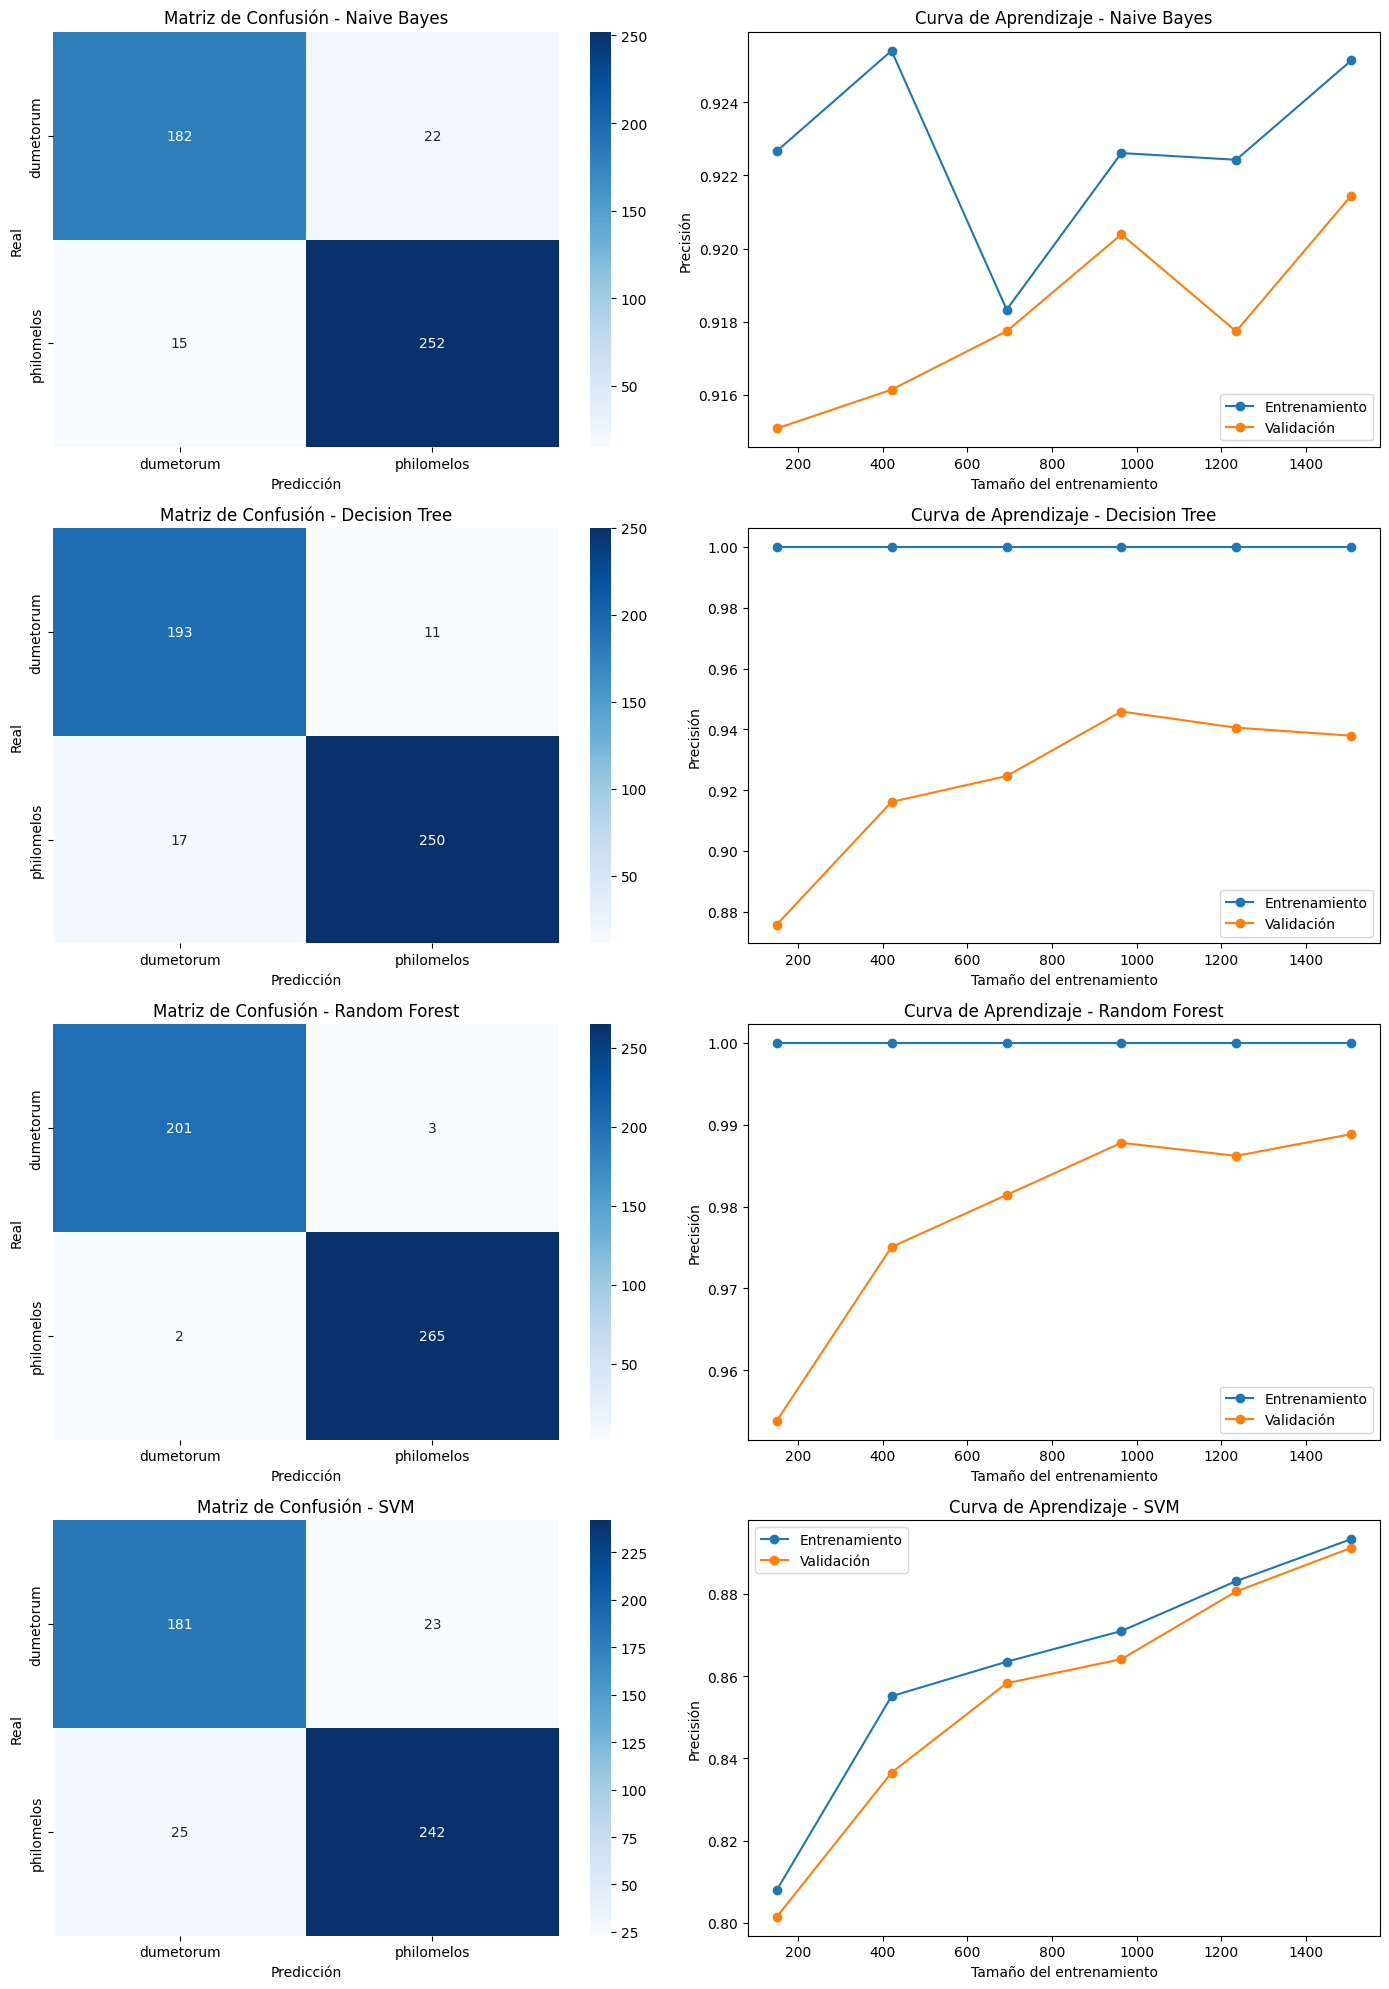

(array(['dumetorum', 'philomelos'], dtype=object),
 GaussianNB(),
 DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 SVC(probability=True, random_state=42))

In [ ]:
# Tomar las especies deseadas del top
especies_objetivo = top_species[:2]

# Filtrar el df en base a eso
df_filtrado = df[df['species'].isin(especies_objetivo)].copy()

# Entrenar con GN DT RF SVM
entrenarGnDtRfSvm(df_filtrado, 0.2)

Test con las 5 especies que más tienen registros

📊 Distribución de especies:
species
philomelos       1333
dumetorum        1022
megarhynchos      693
merula            485
schoenobaenus     476
Name: count, dtype: int64 

Total registros: 4009
Características: 20
Train: 3207 | Test: 802

Especies testeadas: {0: 'dumetorum', 1: 'megarhynchos', 2: 'merula', 3: 'philomelos', 4: 'schoenobaenus'}

--------------------------------------------------
🧠 Entrenando modelo: Naive Bayes
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       204
           1       0.58      0.37      0.45       139
           2       0.72      0.70      0.71        97
           3       0.76      0.84      0.80       267
           4       0.59      0.72      0.64        95

    accuracy                           0.71       802
   macro avg       0.68      0.68      0.67       802
weighted avg       0.70      0.71      0.70       802

Train: 0.723 | Test: 0.711 | Gap: 0.012
🟢 Modelo bien generalizado.

----------

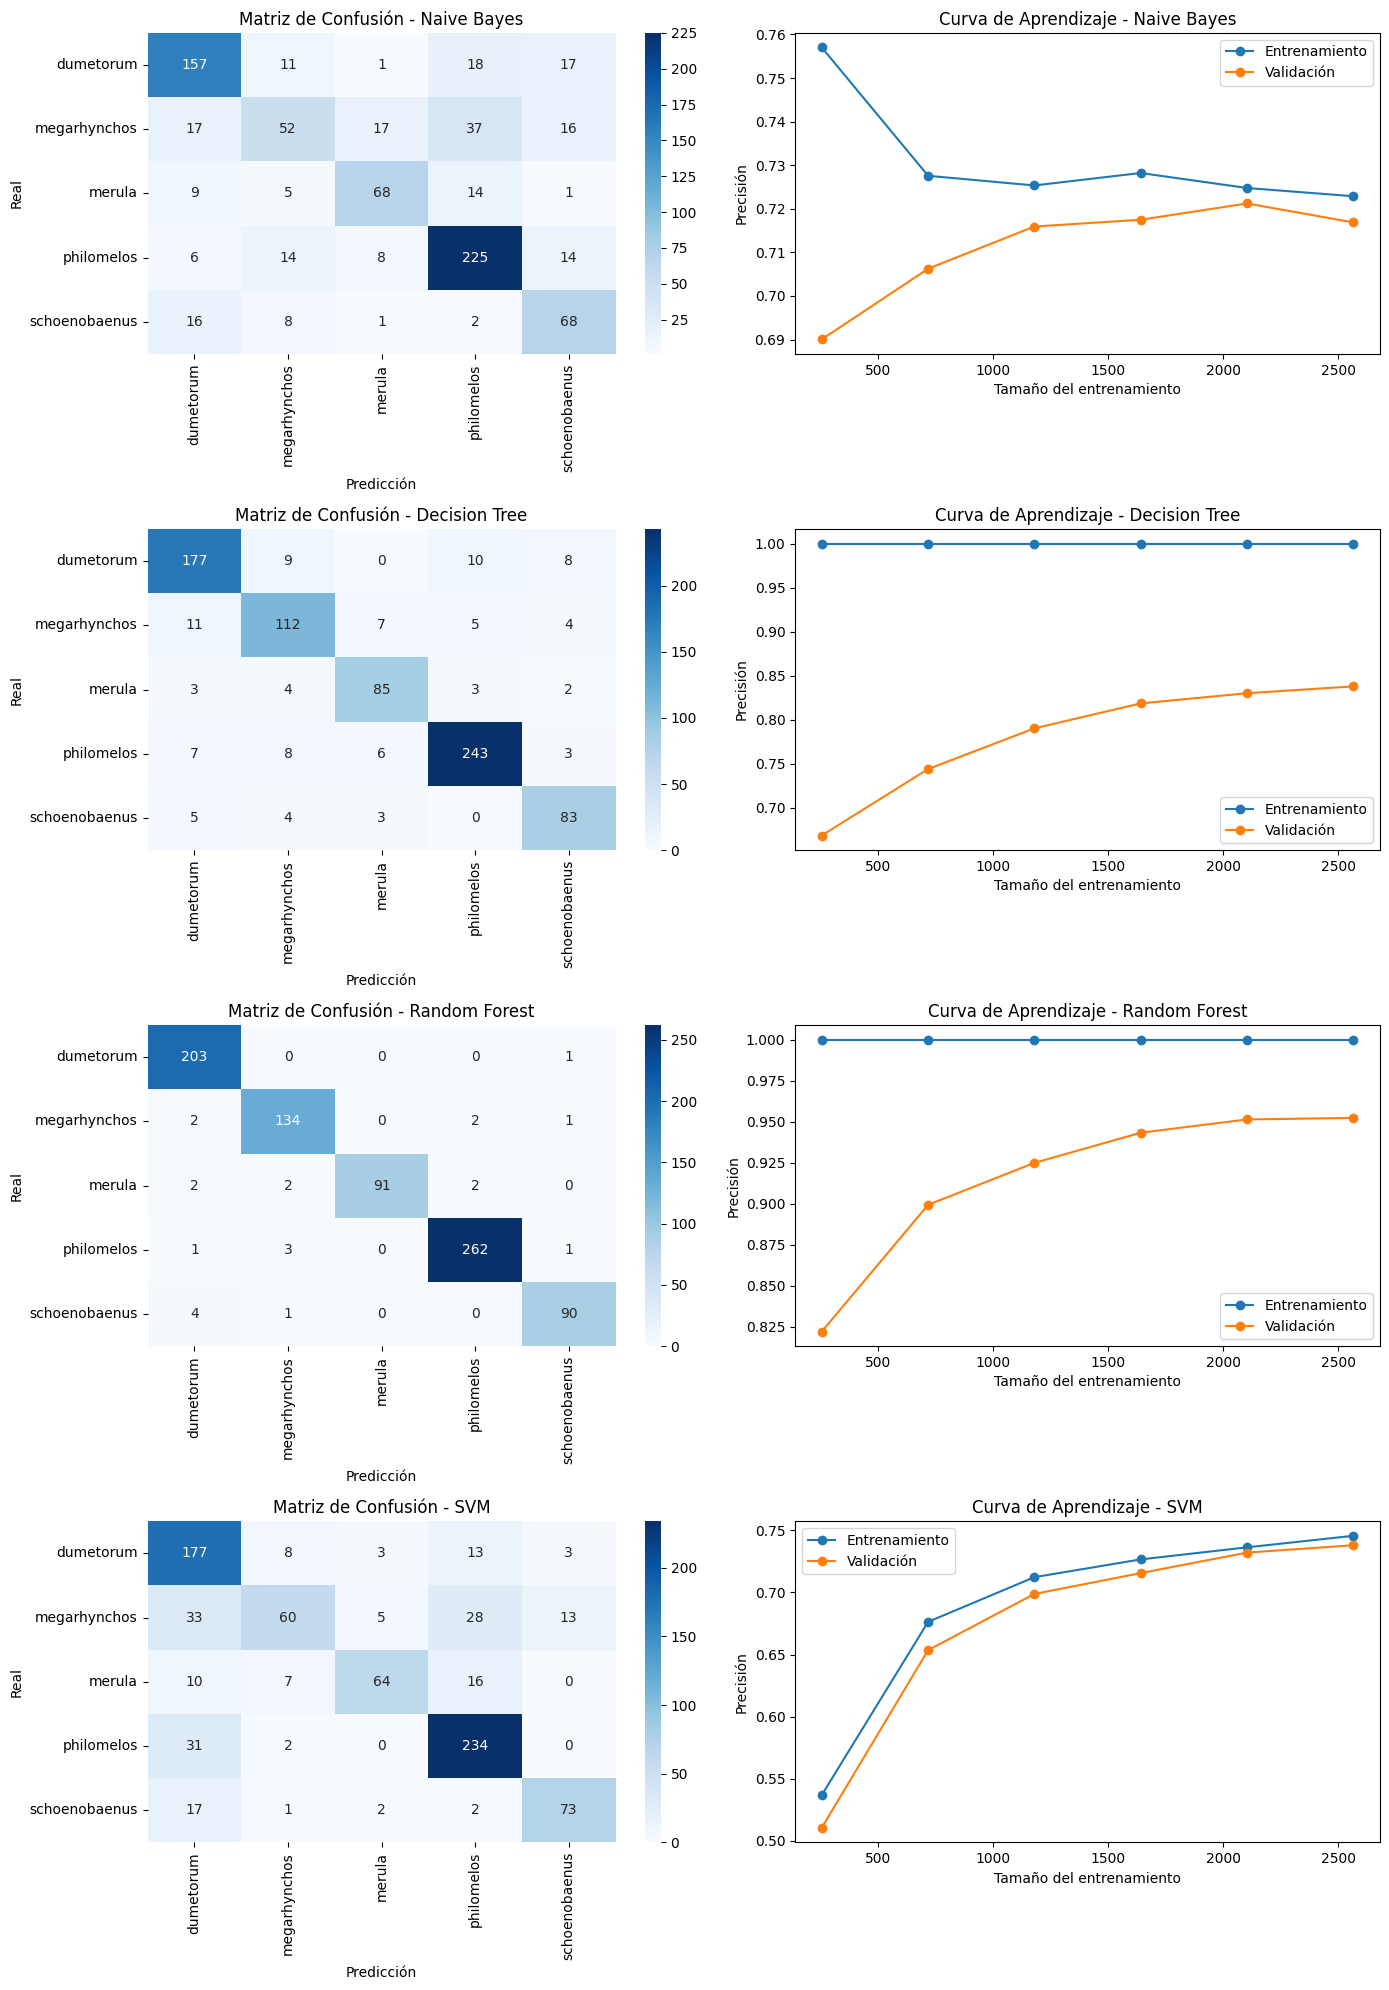

(array(['dumetorum', 'megarhynchos', 'merula', 'philomelos',
        'schoenobaenus'], dtype=object),
 GaussianNB(),
 DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 SVC(probability=True, random_state=42))

In [ ]:
# Tomar las especies deseadas del top
especies_objetivo = top_species[:5]

# Filtrar el df en base a eso
df_filtrado = df[df['species'].isin(especies_objetivo)].copy()

# Entrenar con GN DT RF SVM
entrenarGnDtRfSvm(df_filtrado, 0.2)

Test con todas las especies

📊 Distribución de especies:
species
philomelos       1333
dumetorum        1022
megarhynchos      693
merula            485
schoenobaenus     476
luscinia          466
sibilatrix        461
calandra          457
funereus          441
atricapilla       434
carduelis         433
parva             427
naevia            425
communis          424
canorus           395
arundinaceus      387
chloris           378
caeruleus         365
phoenicurus       365
borin             364
aluco             360
rubecula          345
major             341
trochilus         315
collybita         315
europaeus         315
rubetra           300
bubo              277
crex              267
curruca           255
coelebs           238
troglodytes       228
Name: count, dtype: int64 

Total registros: 13787
Características: 20
Train: 11029 | Test: 2758

Especies testeadas: {0: 'aluco', 1: 'arundinaceus', 2: 'atricapilla', 3: 'borin', 4: 'bubo', 5: 'caeruleus', 6: 'calandra', 7: 'canorus', 8: 'carduelis', 9: 'chlo

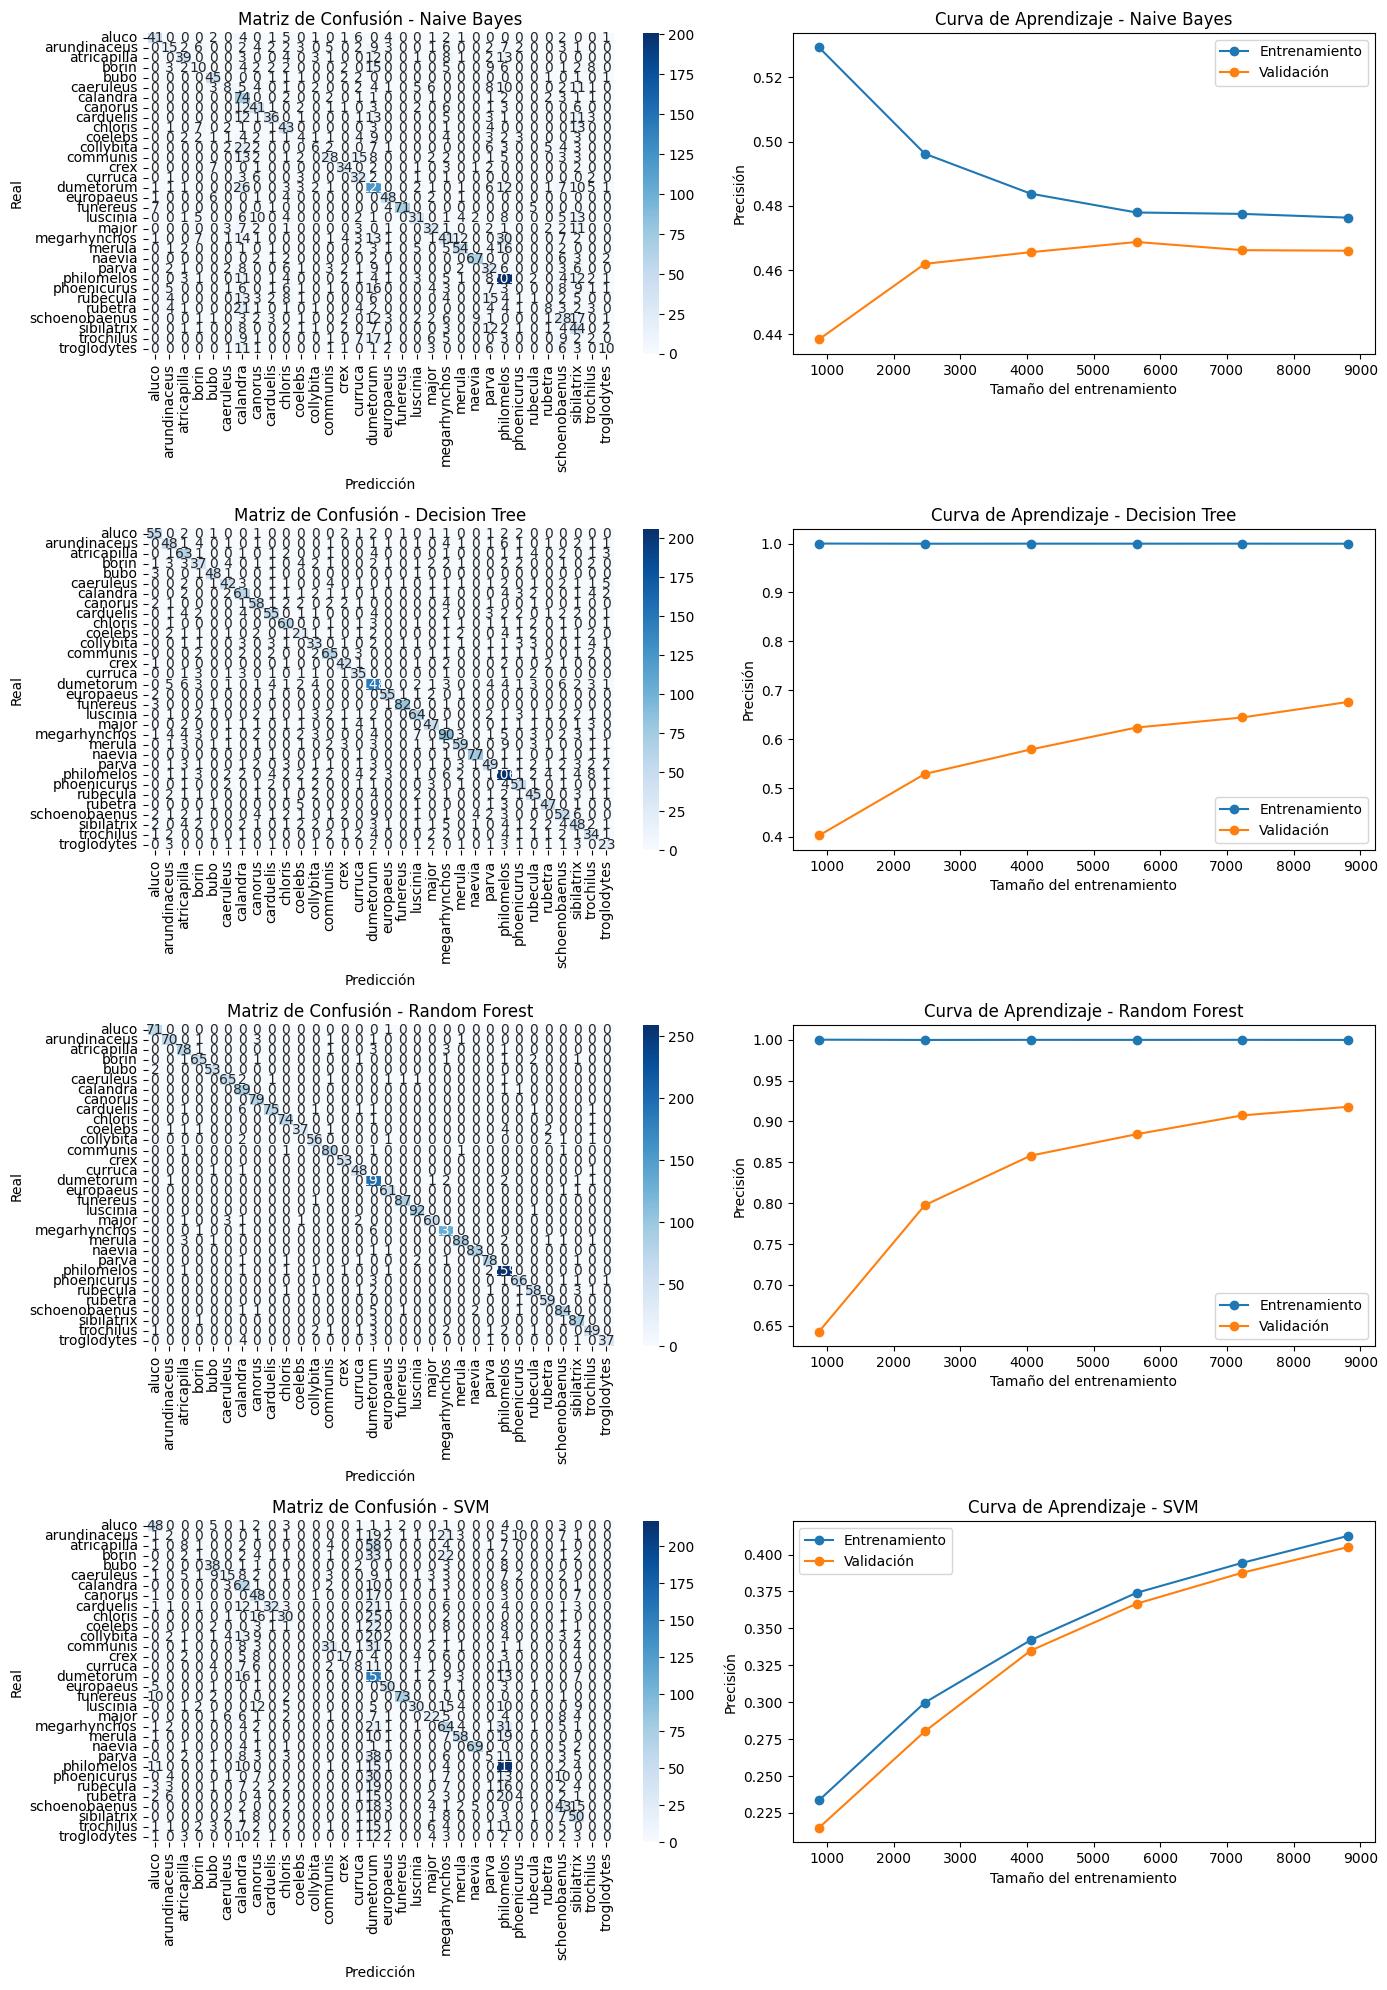

(array(['aluco', 'arundinaceus', 'atricapilla', 'borin', 'bubo',
        'caeruleus', 'calandra', 'canorus', 'carduelis', 'chloris',
        'coelebs', 'collybita', 'communis', 'crex', 'curruca', 'dumetorum',
        'europaeus', 'funereus', 'luscinia', 'major', 'megarhynchos',
        'merula', 'naevia', 'parva', 'philomelos', 'phoenicurus',
        'rubecula', 'rubetra', 'schoenobaenus', 'sibilatrix', 'trochilus',
        'troglodytes'], dtype=object),
 GaussianNB(),
 DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 SVC(probability=True, random_state=42))

In [ ]:
# Tomar las especies deseadas del top
especies_objetivo = top_species[:]

# Filtrar el df en base a eso
df_filtrado = df[df['species'].isin(especies_objetivo)].copy()

# Entrenar con GN DT RF SVM
entrenarGnDtRfSvm(df_filtrado, 0.2)

DNN

X_train: (11029, 20)
X_test: (2758, 20)
y_train_ohe: (11029, 32)
y_test_ohe: (2758, 32)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,608 (189.88 KB)

 Trainable params: 48,608 (189.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0968 - loss: 0.1391 - val_accuracy: 0.2132 - val_loss: 0.1293
Epoch 2/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2230 - loss: 0.1273 - val_accuracy: 0.2542 - val_loss: 0.1230
Epoch 3/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2604 - loss: 0.1213 - val_accuracy: 0.2803 - val_loss: 0.1183
Epoch 4/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2794 - loss: 0.1169 - val_accuracy: 0.3162 - val_loss: 0.1134
Epoch 5/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3163 - loss: 0.1122 - val_accuracy: 0.3474 - val_loss: 0.1090
Epoch 6/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3442 - loss: 0.1073 - val_accuracy: 0.3673 - val_loss: 0.1051
Epoch 7/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3689 - loss: 0.1044 - val_accuracy: 0.4003 - val_loss: 0.1012
Epoch 8/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3954 - loss: 0.1004 - val_accuracy: 0.

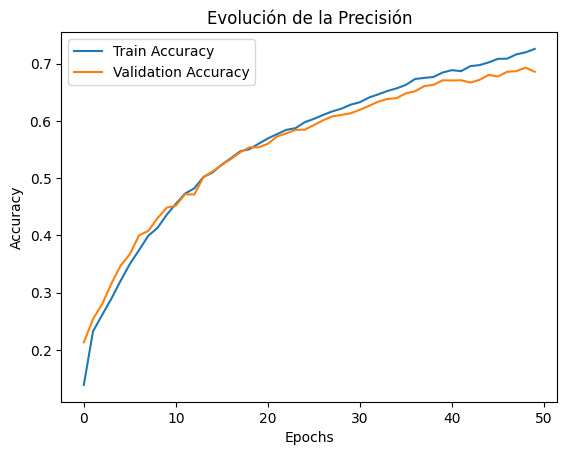

In [ ]:
# ------------------------------------------------------------
# 1️⃣ Separar datos en entrenamiento y prueba
# ------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt

# Extraer características y etiquetas
cols = df.columns[12:32]
X = df[cols]

encoder = LabelEncoder()
y = encoder.fit_transform(df['species'])

# Separar datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# One-hot encoding de las etiquetas
y_train_ohe = tf.keras.utils.to_categorical(y_train)
y_test_ohe = tf.keras.utils.to_categorical(y_test)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train_ohe:", y_train_ohe.shape)
print("y_test_ohe:", y_test_ohe.shape)

# ------------------------------------------------------------
# 2️⃣ Definir el modelo (según tu formato)
# ------------------------------------------------------------
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),  # ✅ CORREGIDO
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.tanh),
    tf.keras.layers.Dense(64, activation=tf.nn.tanh),
    tf.keras.layers.Dense(32, activation=tf.nn.softmax)  # 32 clases -> ajustado según tus etiquetas
])

model.summary()

# ------------------------------------------------------------
# 3️⃣ Compilar y entrenar el modelo
# ------------------------------------------------------------
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train_ohe,
    epochs=50,
    batch_size=100,
    validation_data=(X_test, y_test_ohe),
    verbose=1
)

# ------------------------------------------------------------
# 4️⃣ Graficar precisión
# ------------------------------------------------------------
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Evolución de la Precisión')
plt.legend()
plt.show()


---
# **Modelos NO Supervisados**

In [ ]:
# Extraer las características deseadas
cols = df.columns[12:32]
X = df[cols].values
print(f"X: filas, columas = {X.shape}")

# Extraer las etiquetas
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(df['species'])
print(f"y: filas, columas = {y.shape}")

# Para saber qué número corresponde a qué especie:
clases_dict = {i: clase for i, clase in enumerate(encoder.classes_)}
print(f"Especies codificadas: {clases_dict}\n")

X: filas, columas = (13787, 20)
y: filas, columas = (13787,)
Especies codificadas: {0: 'aluco', 1: 'arundinaceus', 2: 'atricapilla', 3: 'borin', 4: 'bubo', 5: 'caeruleus', 6: 'calandra', 7: 'canorus', 8: 'carduelis', 9: 'chloris', 10: 'coelebs', 11: 'collybita', 12: 'communis', 13: 'crex', 14: 'curruca', 15: 'dumetorum', 16: 'europaeus', 17: 'funereus', 18: 'luscinia', 19: 'major', 20: 'megarhynchos', 21: 'merula', 22: 'naevia', 23: 'parva', 24: 'philomelos', 25: 'phoenicurus', 26: 'rubecula', 27: 'rubetra', 28: 'schoenobaenus', 29: 'sibilatrix', 30: 'trochilus', 31: 'troglodytes'}



## Punto 1

Para el dataset de su proyecto. Realice un train-test (80,20) y proceda con la siguiente implementación:

-  Realice un PCA, haciendo una reducción de características a la mitad. (#componentes = #features/2)
-  Concatene las caracteristicas del PCA con las originales, es decir X = [Features; PCA_features]
-  Entrene tres clasificadores/regresores (según su proyecto) con una DNN, usando las siguientes configuraciones:
    - Entrenando solo con las Features originales
    - Entrenando con las features originales y las del PCA  [Features; PCA_features]
    - Entrenando solo con las del PCA.
- Reporte los resultados tanto de entrenamiento como de test. Use al menos dos métricas.
- Construya una conclusión donde analice los resultados obtenidos y proponga una mejora.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

para_train, para_test = 0.8, 0.2

# Separar datos de entrada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=para_test, random_state=42)

# Obtener número de filas y columnas de X de entrada
num_rows, num_cols = X.shape

# Obtener el numero de clases
num_clases = len(np.unique(y))

# ------------------------------------------------------------------------
# PCA
componentes = int(num_cols/2) # 10 porque son 20 features
pca = PCA(n_components=componentes, random_state=21)
X_pca = pca.fit_transform(X)  # Obtener componentes principales

# Obtener número de filas y columnas de X_pca
num_rows_X_pca, num_cols_X_pca = X_pca.shape
# ------------------------------------------------------------------------

# Separar datos de solo PCA
pca_X_train, pca_X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=para_test, random_state=42)

# Concatenar las originales con las PCA
X_concat = np.concatenate([X, X_pca], axis=1)

# Obtener número de filas y columnas de X concatenado con X_pca
num_rows_X_pca_concat, num_cols_X_pca_concat = X_concat.shape

# Separar datos concatenados con PCA
pca_concat_X_train, pca_concat_X_test, y_train, y_test = train_test_split(
    X_concat, y, test_size=para_test, random_state=42)

Para la DNN

In [ ]:
epocas = 20

def definirDNN(num_columnas, num_clases):
  # Definir modelo
  model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[num_columnas]), # Capa de procesamiento
    tf.keras.layers.Dense(256, activation=tf.nn.relu), # Añadir capa de  neuronas
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.tanh),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_clases, activation=tf.nn.softmax) # Última capa (equivalente al número de clases o etiquetas)
    ])

  model.summary()
  return model

Entrenando solo con las Features originales

---



In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, f1_score

# Definir modelo
model = definirDNN(num_cols, num_clases)

# Entrenar red
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=epocas) # verbose=0

# Obtener perdida del modelo y accuracy
test_loss, test_acc = model.evaluate(X_test, y_test) # verbose=0

y_pred_train = np.argmax(model.predict(X_train), axis=1)
y_pred_test = np.argmax(model.predict(X_test), axis=1)

# Métricas
acc_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print(f"test_acc = {test_acc} , train_acc = {acc_train} , f1_test = {f1_test} , f1_train = {f1_train}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,120 (254.38 KB)

 Trainable params: 65,120 (254.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0928 - loss: 3.4504
Epoch 2/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1212 - loss: 3.3192
Epoch 3/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1642 - loss: 3.1481
Epoch 4/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2133 - loss: 2.9341
Epoch 5/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2585 - loss: 2.7649
Epoch 6/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2885 - loss: 2.6075
Epoch 7/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2965 - loss: 2.5343
Epoch 8/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3313 - loss: 2.4110
Epoch 9/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3456 - loss: 2.3581
Epoch 10/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3546 - loss: 2.3312
Epoch 11/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3751 - loss: 2.2167
Epoch 12/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Entrenando con las features originales y las del PCA [Features; PCA_features]

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Definir modelo
model = definirDNN(num_cols_X_pca_concat, num_clases)

# Entrenar red
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(pca_concat_X_train, y_train, epochs=epocas) # verbose=0

# Obtener perdida del modelo y accuracy
test_loss, test_acc = model.evaluate(pca_concat_X_test, y_test) # verbose=0

pca_concat_y_pred_train = np.argmax(model.predict(pca_concat_X_train), axis=1)
pca_concat_y_pred_test = np.argmax(model.predict(pca_concat_X_test), axis=1)

# Métricas
pca_concat_acc_train = accuracy_score(y_train, pca_concat_y_pred_train)
pca_concat_f1_train = f1_score(y_train, pca_concat_y_pred_train, average='weighted')
pca_concat_f1_test = f1_score(y_test, pca_concat_y_pred_test, average='weighted')

print(f"test_acc = {test_acc} , train_acc = {pca_concat_acc_train} , f1_test = {pca_concat_f1_test} , f1_train = {pca_concat_f1_train}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,680 (264.38 KB)

 Trainable params: 67,680 (264.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0975 - loss: 3.3959
Epoch 2/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1506 - loss: 3.2248
Epoch 3/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2133 - loss: 3.0041
Epoch 4/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2534 - loss: 2.7593
Epoch 5/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3079 - loss: 2.5460
Epoch 6/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3363 - loss: 2.4296
Epoch 7/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3609 - loss: 2.2918
Epoch 8/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4041 - loss: 2.1714
Epoch 9/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4272 - loss: 2.0460
Epoch 10/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4448 - loss: 1.9957
Epoch 11/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4614 - loss: 1.9269
Epoch 12/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Entrenando solo con las del PCA.

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Definir modelo
model = definirDNN(num_cols_X_pca, num_clases)

# Entrenar red
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(pca_X_train, y_train, epochs=epocas) # verbose=0

# Obtener perdida del modelo y accuracy
test_loss, test_acc = model.evaluate(pca_X_test, y_test) # verbose=0

pca_y_pred_train = np.argmax(model.predict(pca_X_train), axis=1)
pca_y_pred_test = np.argmax(model.predict(pca_X_test), axis=1)

# Métricas
pca_acc_train = accuracy_score(y_train, pca_y_pred_train)
pca_f1_train = f1_score(y_train, pca_y_pred_train, average='weighted')
pca_f1_test = f1_score(y_test, pca_y_pred_test, average='weighted')

print(f"test_acc = {test_acc} , train_acc = {pca_acc_train} , f1_test = {pca_f1_test} , f1_train = {pca_f1_train}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,560 (244.38 KB)

 Trainable params: 62,560 (244.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2422 - loss: 2.9847
Epoch 2/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4834 - loss: 2.0402
Epoch 3/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5758 - loss: 1.6456
Epoch 4/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6448 - loss: 1.3859
Epoch 5/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6715 - loss: 1.2778
Epoch 6/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7135 - loss: 1.1242
Epoch 7/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7527 - loss: 1.0001
Epoch 8/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7644 - loss: 0.9111
Epoch 9/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7871 - loss: 0.8465
Epoch 10/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7928 - loss: 0.7980
Epoch 11/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8059 - loss: 0.7443
Epoch 12/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

**Conclusiones:**

.

1. Efectividad de PCA:

PCA solo supera significativamente a las otras configuraciones

Test accuracy: PCA solo (80.4%) vs Features originales (39.8%) vs Combinación (56.4%)

PCA captura la información más relevante eliminando ruido y redundancia

.

2. Curvas de Aprendizaje:

PCA solo: Aprendizaje más rápido y estable desde épocas tempranas

Features originales: Progreso lento con accuracy final bajo

Combinación: Mejora sobre features originales pero no alcanza a PCA solo

.


3. Sobre-parametrización:

Las features originales contienen ruido que dificulta el aprendizaje

PCA actúa como regularizador natural al mantener solo componentes informativas

La combinación features + PCA introduce redundancia sin beneficio adicional

.


4. Generalización:

PCA muestra mejor generalización: menor gap entre entrenamiento y test

Menor overfitting en modelo con PCA comparado con otras configuraciones

Pérdida de test más baja (0.73 vs 2.18 y 1.61)

.

**Mejoras:**

.

1. Optimización del Preprocesamiento:

Implementar escalado estandarizado antes de aplicar PCA para asegurar comparabilidad entre variables

Realizar limpieza básica de datos: eliminar variables constantes y manejar valores atípicos extremos




## Punto 2

Utilizando exclusivamente las caracteristicas de su problema, realice lo siguiente:
- Con un subconjunto de entrenamiento, entrene un árbol de decisión y reporte las dos características más importantes.
- Entrene un PCA con dos componentes y un T-sne con dos componentes.
- Normalice los datos. Realice un kmeans con K=#de clases. También realice un dpscan (seleccione los parámetros). Utilice como entrenamiento las características originales.
- Realice una visualización del dataset con respecto a cuatro plots (grilla de visualización de  3x3):
  - Primera fila, tres plots, donde los ejes sean los valores del PCA. En un plot el color corresponde a la agrupación del kmeans, en otro plot al DBSCAN y en el último a las clases del dataset
  - Segunda fila, tres plots, donde los ejes sean los valores del T-sne. En un plot el color corresponde a la agrupación del kmeans, en otro plot al DBSCAN y en el último a las clases del dataset
  - Tercera fila, tres plots, donde los ejes sean las mejores dos características del árbol de decisión. En un plot el color corresponde a la agrupación del kmeans, en otro plot al DBSCAN y en el último a las clases del dataset

In [ ]:
semillaRandom = 42

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split

# Subconjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# Entrenar árbol
dtc = DecisionTreeClassifier(random_state=semillaRandom)
dtc.fit(X_train, y_train)

# Reportar dos características más importantes
importances = dtc.feature_importances_
top2 = importances.argsort()[-2:][::-1]
print("Top 2 features:", [cols[i] for i in top2])

# --------------------------------------------------
# Entrenar PCA
pca_breast = PCA(n_components= 2, whiten=True, random_state=semillaRandom)
X_pca = pca_breast.fit_transform(X)

# Entrenar TNSE
tsne_breast = TSNE(n_components=2, learning_rate='auto', random_state=semillaRandom)
X_tsne = tsne_breast.fit_transform(X)

# --------------------------------------------------
# Normalizar
X_scaled = StandardScaler().fit_transform(X)

# Obtener el numero de clases
num_clases = len(np.unique(y))

# KMeans con K = número de clases originales
kmeans = KMeans(n_clusters=num_clases, random_state=semillaRandom)
kmeans_labels = kmeans.fit_predict(X_scaled)

# DBSCAN (parámetros básicos: eps y min_samples)
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

Top 2 features: ['spectral_contrast_4', 'mfcc_3']


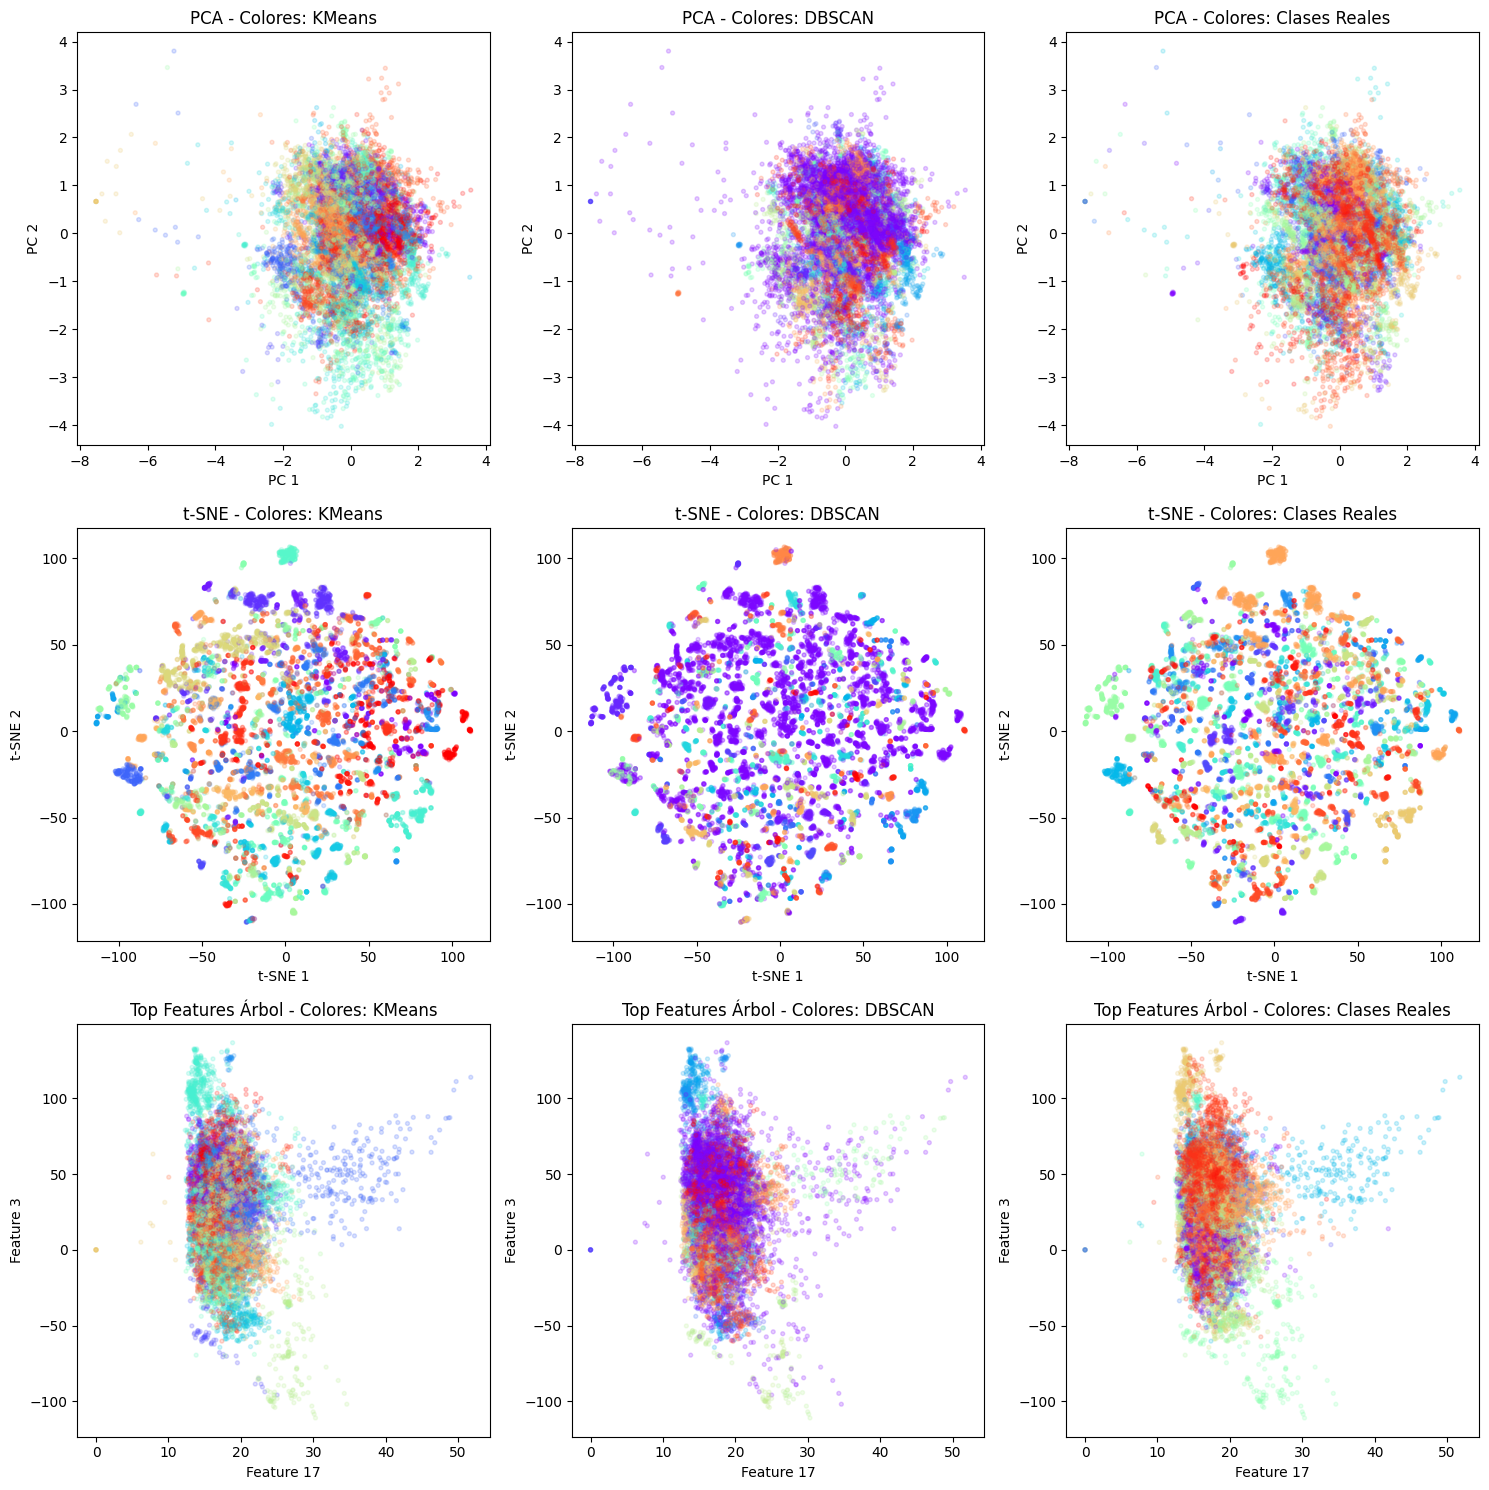

In [ ]:
alphaa = 0.2
tamanoDots = 8

# Crear la grilla de visualización 3x3
plt.figure(figsize=(15, 15))

# PRIMERA FILA: Visualizaciones con PCA
# Plot 1: PCA con colores de KMeans
plt.subplot(3, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='rainbow', alpha=alphaa, s=tamanoDots)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA - Colores: KMeans")

# Plot 2: PCA con colores de DBSCAN
plt.subplot(3, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='rainbow', alpha=alphaa, s=tamanoDots)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA - Colores: DBSCAN")

# Plot 3: PCA con colores de clases reales
plt.subplot(3, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='rainbow', alpha=alphaa, s=tamanoDots)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA - Colores: Clases Reales")

# SEGUNDA FILA: Visualizaciones con T-SNE
# Plot 4: T-SNE con colores de KMeans
plt.subplot(3, 3, 4)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='rainbow', alpha=alphaa, s=tamanoDots)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE - Colores: KMeans")

# Plot 5: T-SNE con colores de DBSCAN
plt.subplot(3, 3, 5)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dbscan_labels, cmap='rainbow', alpha=alphaa, s=tamanoDots)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE - Colores: DBSCAN")

# Plot 6: T-SNE con colores de clases reales
plt.subplot(3, 3, 6)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='rainbow', alpha=alphaa, s=tamanoDots)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE - Colores: Clases Reales")

# TERCERA FILA: Visualizaciones con las 2 mejores features del árbol
# Obtener las dos características más importantes
top2_features = X[:, top2]

# Plot 7: Mejores features con colores de KMeans
plt.subplot(3, 3, 7)
plt.scatter(top2_features[:, 0], top2_features[:, 1], c=kmeans_labels, cmap='rainbow', alpha=alphaa, s=tamanoDots)
plt.xlabel(f"Feature {top2[0]}")
plt.ylabel(f"Feature {top2[1]}")
plt.title("Top Features Árbol - Colores: KMeans")

# Plot 8: Mejores features con colores de DBSCAN
plt.subplot(3, 3, 8)
plt.scatter(top2_features[:, 0], top2_features[:, 1], c=dbscan_labels, cmap='rainbow', alpha=alphaa, s=tamanoDots)
plt.xlabel(f"Feature {top2[0]}")
plt.ylabel(f"Feature {top2[1]}")
plt.title("Top Features Árbol - Colores: DBSCAN")

# Plot 9: Mejores features con colores de clases reales
plt.subplot(3, 3, 9)
plt.scatter(top2_features[:, 0], top2_features[:, 1], c=y, cmap='rainbow', alpha=alphaa, s=tamanoDots)
plt.xlabel(f"Feature {top2[0]}")
plt.ylabel(f"Feature {top2[1]}")
plt.title("Top Features Árbol - Colores: Clases Reales")

# Ajustar el layout y mostrar
plt.tight_layout()
plt.show()

# **Conclusiones**

Nuestro dataset demuestra un desbalance en audios por género con dos especies dominantes lo cual podría estar causando un overfitting en algoritmos de entrenamiento supervisado y un difícil entrenamiento en algoritmos supervisados. Usando una reducción de dimensiones con técnicas como PCA obtenemos una mejor precisión con una red neuronal profunda, aunque los datos reales muestran una poca varianza, con diferentes especies solapadas entre sí.